# Megaline: unveiling user behavior patterns


Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.

Using behavior data about subscribers who have already switched to the new plans we will develop a model that will pick the right plan to offer. 

The database has already been pre-processed, so we will move straight to creating a model with the highest possible accuracy, above a threshold of 0.75. Accuracy will be tested using the test dataset.

## Data description

Every observation in the dataset contains monthly behavior information about one user. 

The information given is as follows:

- ``сalls`` — number of calls

- ``minutes`` — total call duration in minutes

- ``messages`` — number of text messages

- ``mb_used`` — Internet traffic used in MB

- ``is_ultra`` — plan for the current month (Ultra - 1, Smart - 0).


## 1) Import libraries 


In [38]:
#Import libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.dummy import DummyClassifier

## 2) Load the dataset into a dataframe

In [39]:
# Load companies data into a Dataframe
try:
    df=pd.read_csv('c:/Users/josef/Practicum/Machine learning/users_behavior.csv')
except:
    df=pd.read_csv('/datasets/users_behavior.csv')

## 3) Open and look through the data file

In [40]:
#Print first five rows
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [41]:
#Print a randome sample of five rows
df.sample(5)

,calls,minutes,messages,mb_used,is_ultra
2786,28.0,152.39,21.0,23045.10,0
693,156.0,999.53,114.0,21535.16,1
3141,6.0,32.49,12.0,1444.15,1
3198,22.0,151.00,51.0,30466.84,1
858,30.0,178.80,45.0,22732.71,0


In [42]:
#Print general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [43]:
#Check if there are potentially duplicated rows
df.duplicated().sum()

0


## Conclusion

From an overall data view, we can tell that the dataset is ready to start developing the model:

1) Data types of all columns are either integers or floats.

2) There are no missing values (every column has 3214 non-null entries, matching the length of the dataset).

3) Columns are correctly named.

4) There are no duplicates

## 4) Split the source data into a training set, a validation set, and a test set

The validation dataset is separated from the source dataset before the model is trained. Otherwise, the model would know all the answers after learning from the training set. Validation shows how the models act in the field and helps to reveal overfitting.

Provided that there is no test set available, in this case, the source data has to be split into three parts: training, validation, and test. 

Since the sizes of validation set and test set are usually equal, source data will be split in a 3:1:1 ratio.

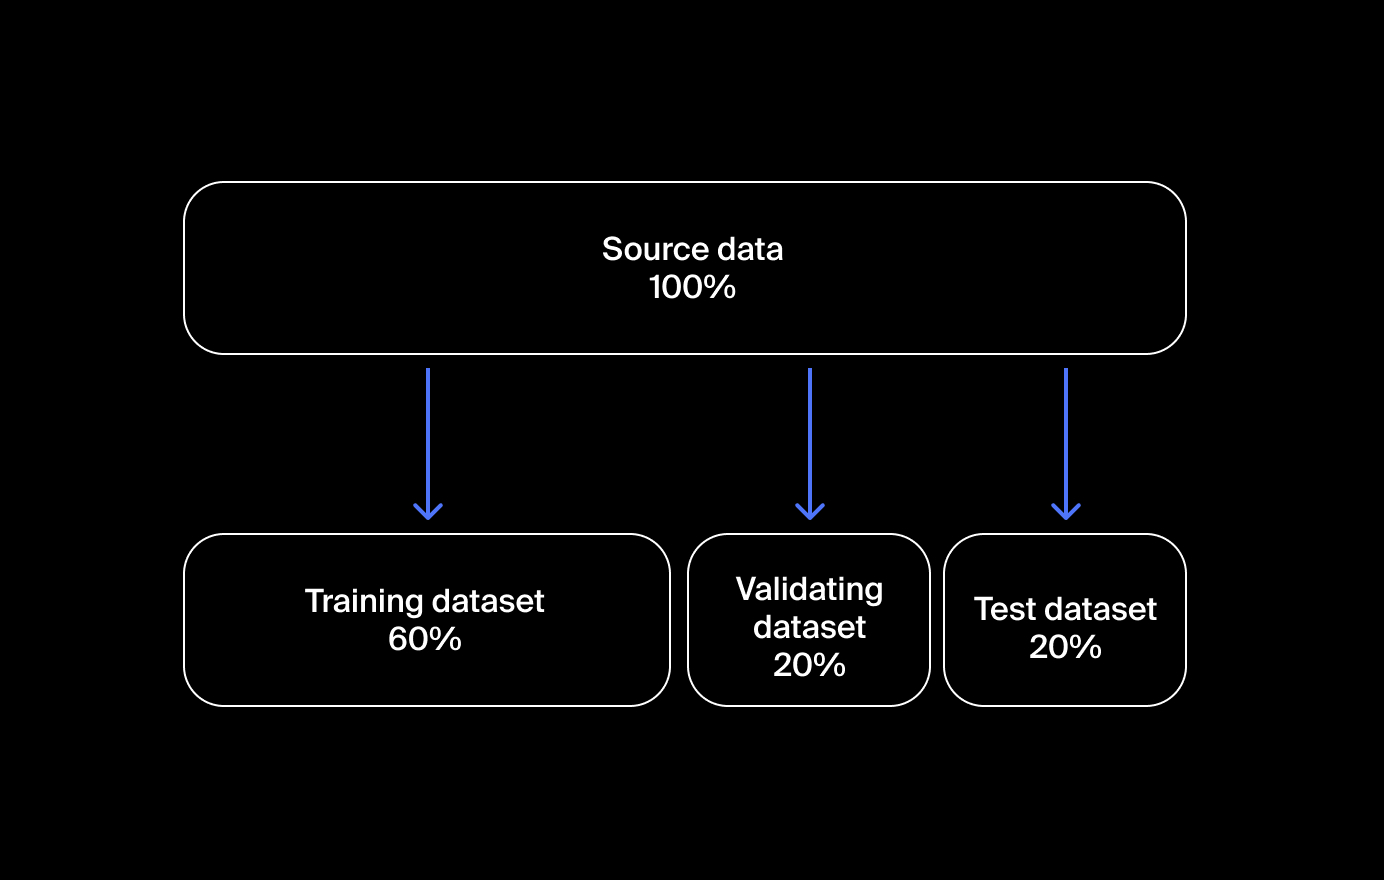

In [44]:
# Use train_test_split to first make the split on the original dataset into train and test

train_df, test_df = train_test_split(df, test_size=0.20, random_state= 12345)

In [45]:
# Make the split on the train dataset into train and validation

train_df, valid_df = train_test_split(train_df, test_size= 0.25, random_state = 12345)

In [46]:
# Check on new datasets size

print(f'train_df accounts for the {round(len(train_df)/len(df),2):.0%} of the dataset, whereas valid_df accounts for the {round(len(valid_df)/len(df),2):.0%} and test_df is comprised by the remaining {round(len(test_df)/len(df),2):.0%} ')


train_df accounts for the 60% of the dataset, whereas valid_df accounts for the 20% and test_df is comprised by the remaining 20% 


The dataset was correctly split into three portions 

## 5) Separate features and target

The feature that we need to predict is referred to as target. In this case, we want to know if a user behavior is more suitable for the ultra or smart plan, therefore the target will be "is_ultra". The rest of the columns will be the features.

Considering that we'll structure our work around a target feature that we need to predict (user plan) by using the rest of the features, we know this is a supervised learning task.

In [47]:
#print columns names
df.columns

Index(['calls', 'minutes', 'messages', 'mb_used', 'is_ultra'], dtype='object')

In [48]:
#Separate features from target in all datasets

train_features= train_df.drop(['is_ultra'], axis=1)
train_target = train_df['is_ultra']
valid_features= valid_df.drop(['is_ultra'], axis=1)
valid_target = valid_df['is_ultra']
test_features = test_df.drop(['is_ultra'], axis=1)
test_target=test_df['is_ultra']

## 6) Investigate the quality of different models by changing hyperparameters. 

Coming up, we'll assess the accuracy achieved by using different models and tuning hyperparameters within them.

In this case, we are dealing with a classification supervised learning task with only two possible answers: is_ultra = 1 (True) or 0 (False).

Hence, we'll try out the next three different classifiers, training them using the train set and evaluate the accuracy achieved by each of them on the validation set when changing hyperparameters.  Hyperparameters help to improve the model and can be tuned before training.




- DecisionTreeClassifier (Parameters: max_depth)

- RandomForestClassifier (Parameters: max_depth /n_estimators)

- LogisticRegression (solver= 'lbfgs')


Accuracy is the ratio of the number of correct answers to the total number of questions (i.e. the test dataset size). The formula is as follows:

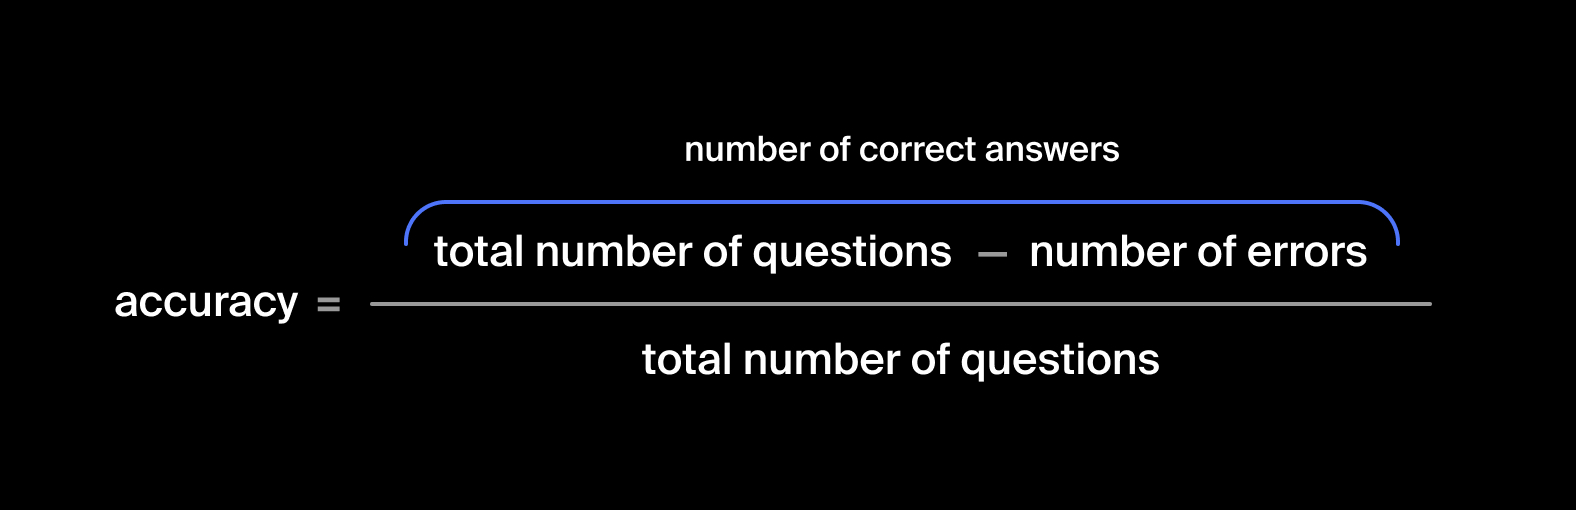


However, all classification models created by algorithms in scikit-learn library have the score() method which allows for testing accuracy without using the predict() method. Once we train the model, we'll send the features to the score() method along with answers, and it will transform these features into predicted labels internally to be compared with answers straightforward.


### 6.1) Decision tree classifier

DecisionTreeClassifier is a class for decision tree classifications. For our task, we will assume that the decision tree determines whether the user behavior makes the ultra plan more suitable for him/her or not (is_ultra = 1 or 0)

Each tree comes out differently. We will train the model to build the most suitable one. In addition to the dataset, we'll need a learning algorithm. The dataset is processed through our learning algorithm, producing a trained model.

We'll make the pseudorandomness static with the random_state parameter, and loop through different values for max_depth (starting by 1 and increasing it in steps of 1), training the model with the train set and assessing accuracy on the validation set at each iteration, until we're able to take it to a percentage higher than 77.7%



In [49]:
# Create a loop that will increase max_depth parameter until accuracy is higher than a 0.777 threshold

#Start with max_depth=1 and highest_accuracy=minimum threshold accepted

depth=1
highest_accuracy_tree = 0.75
model_tree= None

#Create a while loop that increases depth until achieving the threshold

while highest_accuracy_tree < 0.777:
    
    #Assign an empty model to a variable, looping through an increasing depth nº
    
    model_one = DecisionTreeClassifier(random_state=1234, max_depth=depth)
    model_one.fit(train_features, train_target)
    accuracy_tree= model_one.score(valid_features, valid_target)
    
    if accuracy_tree > highest_accuracy_tree:
        highest_accuracy_tree = accuracy_tree
        model_tree = model_one
        depth= depth
        
    depth+=1
        
    
print(f'Model tree= {model_tree}; Accuracy= {round(highest_accuracy_tree,3):.2%}')   


Model tree= DecisionTreeClassifier(max_depth=10, random_state=1234); Accuracy= 77.80%


When setting the "while" condition as up to < 0.777 the loop breaks in a few seconds. But if we use 0.778 instead, it takes too long to issue a result. This means that max_depth would need to be increased steeply for achieving such target, and hence, the duration of training would spike for only a slight improvement in the model quality. That said, we'll say the most efficient Decision tree classifier is one containing a max_depth of 10 nodes.

### 6.2) Random Forest Classifier

In the sklearn library, within the sklearn.ensemble module, we can also find the RandomForestClassifier, which is a random forest algorithm. It trains a large quantity of independent trees and makes a decision by voting. A random forest helps to improve results and avoid overfitting.

We'll store the model in a variable and loop through different values for hyperparameters, training the model with the train set and assessing accuracy on the validation set at each iteration. 

To set the number of trees in the forest, we will use the n_estimators=(number of estimators) hyperparameter. The quality of the end result is directly proportional to the number of trees, but so is the duration of training, so there's a trade-off. 

Below, we'll iterate through an increasing count of estimators, using a max_depth of 10 nodes (based on the Decision tree classifier optimum depth), until achieving an accuracy higher than 79.1%.



In [50]:
# Create a loop that will increase n_estimators parameter until accuracy exceeds a 79.1%

#Start with estimators=1 and highest_accuracy=minimum threshold accepted

estimators=1
highest_accuracy_forest = 0.78
model_forest= None

#Create a while loop that increases depth until achieving the threshold

while highest_accuracy_forest < 0.791:
    
    #Assign an empty model to a variable, looping through an increasing depth nº
    
    model_two = RandomForestClassifier(random_state=1234, max_depth=10, n_estimators=estimators)
    model_two.fit(train_features, train_target)
    accuracy_forest= model_two.score(valid_features, valid_target)
    
    if accuracy_forest > highest_accuracy_forest:
        highest_accuracy_forest = accuracy_forest
        model_forest= model_two
        
        
    estimators+=10
        
    
print(f'Model forest= {model_forest}; Accuracy= {round(highest_accuracy_forest,3):.2%}')  

Model forest= RandomForestClassifier(max_depth=10, n_estimators=21, random_state=1234); Accuracy= 79.20%


Now, we'll see how many estimators are needed to get an accuracy higher than the 79.2%



In [51]:
# Create a loop that will increase n_estimators parameter until accuracy exceeds a 79.2%

#Start with estimators=1 and highest_accuracy=minimum threshold accepted

estimators=1
highest_accuracy_forest = 0.78
model_forest= None

#Create a while loop that increases depth until achieving the threshold

while highest_accuracy_forest < 0.792:
    
    #Assign an empty model to a variable, looping through an increasing depth nº
    
    model_two = RandomForestClassifier(random_state=1234, max_depth=10, n_estimators=estimators)
    model_two.fit(train_features, train_target)
    accuracy_forest= model_two.score(valid_features, valid_target)
    
    if accuracy_forest > highest_accuracy_forest:
        highest_accuracy_forest = accuracy_forest
        model_forest= model_two
        
        
    estimators+=10
        
    
print(f'Model forest= {model_forest}; Accuracy= {round(highest_accuracy_forest,3):.2%}')  

Model forest= RandomForestClassifier(max_depth=10, n_estimators=251, random_state=1234); Accuracy= 79.30%


Here, the most efficiently achievable accuracy was proved to be 79.2%, using 21 estimators. If we set the target accuracy as higher than 79.2%, it takes rather long to get to break the loop, as we'd need to test it using up to 251 estimators. 

Next, we'll try changing the max_depth hyperparameter with 21 estimators.



In [52]:
# Create a loop that will increase max_depth parameter until accuracy is higher than 80% using 21 estimators

#Start with max_depth and highest_accuracy= maximum achieved above

depth=10



#Create a while loop that increases depth until achieving the threshold

while highest_accuracy_forest < 0.799:
    
    #Assign an empty model to a variable, looping through an increasing depth nº
    
    model_two = RandomForestClassifier(random_state=1234, max_depth=depth, n_estimators=21)
    model_two.fit(train_features, train_target)
    accuracy_forest= model_two.score(valid_features, valid_target)
    
    if accuracy_forest > highest_accuracy_forest:
        highest_accuracy_forest = accuracy_forest
        model_forest= model_two
        
        
    depth+=1
        
    
print(f'Model forest= {model_forest}; Accuracy= {round(highest_accuracy_forest,3):.2%}')  

Model forest= RandomForestClassifier(max_depth=14, n_estimators=21, random_state=1234); Accuracy= 79.90%


When tuning depth using the optimum count of estimators, we see that 79.9% is the highest accuracy we can achieve without increasing the duration of training too much. 



### 5.3) Logistic Regression

Finally, we'll try a third learning algorithm and compare its accuracy to the two previously trained models.

Logistic regression has a much simpler structure compared to decision trees, so while it's somewhat rigid, it's not prone to overfitting as much.

Basically, it consists of calculating the probability that a given set of features values corresponds with "1" in the target variable. If the probability is above 50%, then target variable (ultra_plan) will be labeled as "1" Otherwise, it'll be "0"

Logistic regression does not really have any critical hyperparameters to tune.

Despite some differences in performance or convergence can be observed with different solvers (the version of the algorithm that determines how exactly the probability curve is fit), usually they all produce similar results. 

We'll be using the "liblinear" solver because it's the most general one, working well enough for small datasets with a lot of features. Specify solver='lbfgs'. Again, the model will be trained with the train set, and its accuracy will be evaluated based on predictions made for the validation set.




In [53]:
#Create a logistic regression model specifying solver= 'lbfgs'
model_regression= LogisticRegression(random_state=1234, solver='lbfgs')

#Train the dataset with the train features and target
model_regression.fit(train_features, train_target)

#Calculate accuracy of the model using valid features and target
accuracy_regression = model_regression.score(valid_features, valid_target)


print(f'Model Logistic regression= {model_regression}; Accuracy= {round(accuracy_regression,3):.2%}') 

Model Logistic regression= LogisticRegression(random_state=1234); Accuracy= 72.60%


Linear regression is not an option in this case, as it does not allow for achieving the minimum 75% of accuracy we set for this model evaluation metric.


## 7) Check the quality of each model using the test set and select the one with the highest accuracy

In [54]:
#create two variables: final_model and final_accuracy
final_accuracy = 0
final_model= None

#loop through the three models evaluating their accuracy. 
for model in [model_tree, model_forest, model_regression]:
    accuracy= model.score(test_features,test_target)
    
    #store the model with the highest accuracy in final_model, and its accuracy in final_accuracy
    if accuracy > final_accuracy:
        final_accuracy = accuracy
        final_model = model


print(f'The model with the highest accuracy was= {final_model}. Its accuracy was of {final_accuracy:%}')        

The model with the highest accuracy was= RandomForestClassifier(max_depth=14, n_estimators=21, random_state=1234). Its accuracy was of 78.849145%


## 8) Sanity check the model

In order to sanity check the calculations made with the score() method we will:

    a) Store the series containing predictions for the test set into a new variable.
    b) Re-index test_target series, as it was composed by rows selected randomly from a previously indexed dataset.
    c) Create a new serie ("right guesses") storing a 1 if it was a guess, or 0 otherwise.
    d) Sum the total value for right guesses and stored it in "hits"
    e) Divide the total guesses by the nº of attempts (lenght of test_target series)
    f) Compare the abovementioned ratio to the final accuracy obtained in step 7) and ensured it was correctly calculated
    
Once we've ensured it worked correctly, we'll use a dummy model predicting a constant value to use it as a benchmark and compare its accuracy to the one achieved by the Random Forest Classifier.

In [55]:
#Store series containing predictions for the test set in a new variable
test_predictions = pd.Series(final_model.predict(test_features))

#Test target is made of rows selected randomly from a previously indexed dataset. Re-index.
test_target.reset_index(inplace=True, drop=True)

#Create new series (right guesses) setting value as 1 if it was a guess, or 0 otherwise.
right_guesses= pd.Series(map(lambda x,y: int(x==y), test_predictions, test_target))

#Sum the total value for right guesses and store in "hits"
hits= right_guesses.sum()

#Divide total guesses by the nº of attempts (lenght of test_target)
accuracy_checked= hits/len(test_target)

#Compare to final accuracy and ensure it was correctly calculated
accuracy_difference= final_accuracy-accuracy_checked

#Print result of accuracy verification
if accuracy_difference==0:
    print('Accuracy calculation was calculated successfully')
else:
    print('Accuracy calculation is incorrect')

Accuracy calculation was calculated successfully


### Dummy model 

A baseline model is essentially a simple model that acts as a reference in a machine learning project. Its main function is to contextualize the results of trained models.

Baseline models usually lack complexity and may have little predictive power. Regardless, their inclusion is good practice, as they serve as benchmarks for trained models and improve understanding of the data.

In this case, the dummy model built below will predict the most frequent value found in the train target for every observation in the test set.

In [56]:
#Get AUC-ROC for a baseline model (as we said in the introduction, the AUC-ROC achieved by a random model is 0.5)
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(train_features, train_target)
dummy_accuracy= dummy_clf.score(test_features,test_target)
print(f'The accuracy achieved by a constant model predicting always the most frequent value from the train set is {dummy_accuracy:%}')    

The accuracy achieved by a constant model predicting always the most frequent value from the train set is 69.517885%


In [58]:
#print the percentage each value accounts for in the test target
test_target.value_counts()/len(test_target)

0    0.695179
1    0.304821
Name: is_ultra, dtype: float64

As we can see above, as the model always predicted 0 as the target, the accuracy achieved equals the % that value represents in the test target.

# Megaline: unveiling user behavior patterns

## Project summary

Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.

Using behavior data about subscribers who have already switched to the new plans we developed a model that can pick the right plan to offer with a higher accuracy than the threshold of 75%. 


### Data description

Every observation in the dataset contains monthly behavior information about one user. 

The information was given as follows:

- ``сalls`` — number of calls

- ``minutes`` — total call duration in minutes

- ``messages`` — number of text messages

- ``mb_used`` — Internet traffic used in MB

- ``is_ultra`` — plan for the current month (Ultra - 1, Smart - 0).


### Process steps


#### 1) Import libraries
We imported the libraries needed for loading and storing the dataset, creating the models and calculating their accuracy.

#### 2) Load the dataset into a dataframe

The dataset was loaded from a CSV file and stored into a dataframe


#### 3) Open and look through the data file

After printing some dataframe rows, dataframe info and checking on duplicates, we concluded that the data was ready to jump into model training:

1) Data types of all columns are either integers or floats.

2) There are no missing values (every column has 3214 non-null entries, matching the length of the dataset).

3) Columns are correctly named.

4) There are no duplicates

#### 4) Split the source data into a training set, a validation set, and a test set

The validation dataset was separated from the source dataset before the model was trained, using train_test_split from sklearn.model_selection.

Provided that there was no test set available in this case, the source data had to be split into three parts: training, validation, and test. 

Since the sizes of validation set and test set are usually equal, source data was split in a 3:1:1 ratio. (60% train, 20% validation, 20% test)


#### 5) Separate features and target

In this supervised learning task, we wanted to know if user behavior made them more suitable for the ultra or smart plan, therefore the target feature was "is_ultra". The rest of the columns were the features based on which we made the predictions. 

#### 6) Investigate the quality of different models by changing hyperparameters. 

Next step consisted of assessing the accuracy achieved by different models by tuning hyperparameters within them. First, the models were trained using the train set. Then, accuracy on the validation test was tested.

In all of them, we made the pseudorandomness static with the random_state parameter.

As there were only two possible answers: is_ultra = 1 (True) or 0 (False), it was deemed as a classification task.

Hence, we tried out the next three different classifiers, and evaluated the accuracy achieved by each of them when changing hyperparameters. 


- DecisionTreeClassifier (Parameters: max_depth)

- RandomForestClassifier (Parameters: max_depth /n_estimators)

- LogisticRegression (solver= 'lbfgs')


For context, Accuracy is the ratio of the number of correct answers to the total number of questions (i.e. the test dataset size). 

Since all classification models created by algorithms in scikit-learn library have the score() method (which allows for testing accuracy without using predict()), after training the model, we sent the features to the score() method along with answers, and got the accuracy score straightforwardly.


##### 6.1) Decision tree classifier

DecisionTreeClassifier is a class for decision tree classifications. For our task, we assumed that the decision tree would determine whether the user behavior made the ultra plan more suitable for him/her or not (is_ultra = 1 or 0)

Firstly, we created a  while loop that iterated through the decision tree model, training it with the train set and increasing max_depth parameter in steps of 1 until accuracy exceeded a 77.7% threshold for the validation set. When we tried to raise it up to 77.8%, it took too long to issue a result. 

This means that the max_depth would need to be increased steeply for achieving such target, and hence, the duration of training would spike for only a slight improvement in the model quality. That said, the optimal parameters in terms of accuracy and run time results were:

**Model tree= DecisionTreeClassifier(max_depth=10, random_state=1234); Accuracy= 77.80%**



##### 6.2) Random Forest Classifier

Next, we tried with a model made up from a set of decision trees: Random Forest Classifier.

Initially, we also used a while loop that iterated through the model tuning one hyperparameter: n_estimators. It is used to set the number of trees in the forest.

We started by using one estimator, and increased it from 10 to 10, until achieving a 79.1% accuracy on the validation set. Max_depth was set as 10, in conrcondance to the results obtained in the decision tree classifier testing.

The results were as follows:

**Model forest= RandomForestClassifier(max_depth=10, n_estimators=21, random_state=1234); Accuracy= 79.20%**

When changing the condition in the while loop to break it only after an accuracy higher than 79.2% was achieved, we came accross the need of 251 n_estimators. Hence, the previous result was preferred due to its run speed. 

Finally, using 21 n_estimators, we proceeded to optimize max_depth. This time, the model was trained with the train set within a while loop that increased max_depth in units of 1, starting from ten, and only broke once an accuracy of 79.999% on the validation set was achieved.

The final Random Forest Classifier had the following hyperparameters and accuracy:

**Model forest= RandomForestClassifier(max_depth=14, n_estimators=21, random_state=1234); Accuracy= 79.90%**

##### 6.3) Logistic Regression

Finally, we tried a third learning algorithm and compared its accuracy to the two previously trained models.

Logistic regression does not really have any critical hyperparameters to tune.

Despite some differences in performance or convergence can be observed with different solvers (the version of the algorithm that determines how exactly the probability curve is fit), usually they all produce similar results.

In this case, we used the "liblinear" solver because it's the most general one, working well enough for small datasets with a lot of features. The model was trained using the train set, and the prediction accuracy on the validation set was 72%.

We concluded that Linear regression is not an option in this case, as it did not allow for achieving the minimum 75% of accuracy we set for this model evaluation metric.

#####  7) Check the quality of each model using the test set and select the one with the highest accuracy

We calculated the accuracy of predicitons made by each model using test_features, as compared to the test_target.

The model with the highest accuracy was= RandomForestClassifier(max_depth=14, n_estimators=21, random_state=1234). Its accuracy was of 78.849145%

#####  8) Sanity check the model

In order to sanity check the calculations made with the score() method we:

    a) Stored the series containing predictions for the test set into a new variable.
    b) Re-indexed test_target series, as it was composed by rows selected randomly from a previously indexed dataset.
    c) Created a new serie ("right guesses") storing a 1 if it was a guess, or 0 otherwise.
    d) Summed the total value for right guesses and stored it in "hits"
    e) Divided the total guesses by the nº of attempts (lenght of test_target series)
    f) Compared the abovementioned ratio to the final accuracy obtained in step 7) and ensured it was correctly calculated
    
Once we ensured it worked correctly, we compared it to a baseline constant model, which achieved an accuracy of the 69% (10% lower than the random forest classifier).

### Conclusion:

The model we will use to predict whether users suscribed to legacy plans are more likely to switch to Smart or Ultra plans, will be:

RandomForestClassifier(max_depth=14, n_estimators=21, random_state=1234)

The model achieved an accuracy of the 79.9% on the validation test, and of 78.85% on the test set.